<a href="https://colab.research.google.com/github/pawel0508/MachineLearningBootcamp_I/blob/master/RegresjaWielomianowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px

np.random.seed(42)
np.set_printoptions(precision = 6, suppress = True)
sns.set(font_scale = 1.3)
sklearn.__version__


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'0.22.2.post1'

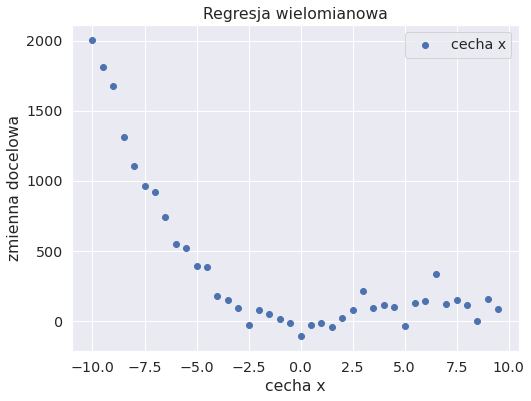

In [4]:

X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40, 1)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.legend()
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_pred_lin = model.predict(X)

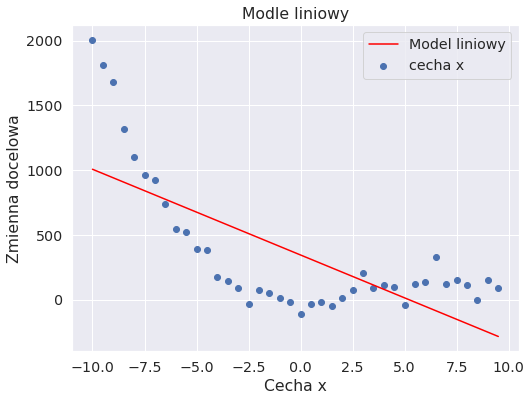

In [15]:
plt.figure(figsize=(8, 6))
plt.title('Modle liniowy')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c = 'red', label = 'Model liniowy')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import r2_score
r2_score(y, y_pred_lin)

0.5113757853996246

In [20]:
df = pd.DataFrame({'X':X.ravel()})
df

,X
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0
5,-7.5
6,-7.0
7,-6.5
8,-6.0
9,-5.5


In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(X)

In [22]:
x_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [29]:
model = LinearRegression()
model.fit(x_poly, y)
y_pred_poly = model.predict(x_poly)
r2_score(y, y_pred_poly)


0.9042294685202636

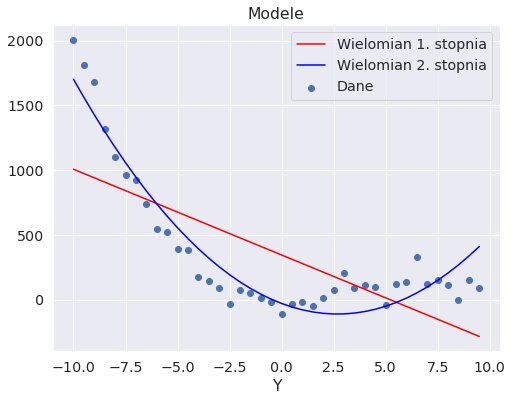

In [27]:
plt.figure(figsize = (8, 6))
plt.title('Modele')
plt.xlabel('X')
plt.xlabel('Y')
plt.scatter(x = X, y = y, label = 'Dane')
plt.plot(X, y_pred_lin, c = 'red', label = 'Wielomian 1. stopnia')
plt.plot(X, y_pred_poly, c = 'blue', label = 'Wielomian 2. stopnia')
plt.legend()
plt.show()

R2 score: 0.98


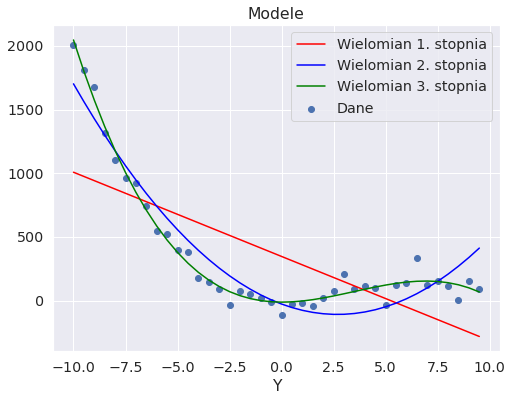

In [31]:
poly_3 = PolynomialFeatures(degree= 3)
x_poly_3 = poly_3.fit_transform(X)

model = LinearRegression()
model.fit(x_poly_3, y)
y_pred_poly_3 = model.predict(x_poly_3)
print(f'R2 score: {r2_score(y, y_pred_poly_3):.2f}')

plt.figure(figsize = (8, 6))
plt.title('Modele')
plt.xlabel('X')
plt.xlabel('Y')
plt.scatter(x = X, y = y, label = 'Dane')
plt.plot(X, y_pred_lin, c = 'red', label = 'Wielomian 1. stopnia')
plt.plot(X, y_pred_poly, c = 'blue', label = 'Wielomian 2. stopnia')
plt.plot(X, y_pred_poly_3, c = 'green', label = 'Wielomian 3. stopnia')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


results = pd.DataFrame(data={
    'name': ['regresja liniowa', 'regresja wielomianowa st. 2', 'regresja wielomianowa st. 3'],
    'r2_score': [r2_score(y, y_pred_lin), r2_score(y, y_pred_poly), r2_score(y, y_pred_poly_3)],
    'mae': [mae(y, y_pred_lin), mae(y, y_pred_poly), mae(y, y_pred_poly_3)],
    'mse': [mse(y, y_pred_lin), mse(y, y_pred_poly), mse(y, y_pred_poly_3)],
    'rmse': [np.sqrt(mse(y, y_pred_lin)), np.sqrt(mse(y, y_pred_poly)), np.sqrt(mse(y, y_pred_poly_3))]    
    })
results

,name,r2_score,mae,mse,rmse
0,regresja liniowa,0.511376,308.143659,139293.277907,373.220147
1,regresja wielomianowa st. 2,0.904229,136.332166,27301.535327,165.231762
2,regresja wielomianowa st. 3,0.984592,48.460719,4392.374770,66.274994


In [34]:
px.bar(results, x='name', y='r2_score', width=700, title='Regresja wielomianowa - R2_score')

px.bar(results, x='name', y='mae', width=700, title='Regresja wielomianowa - mean absolute error')

px.bar(results, x='name', y='mse', width=700, title='Regresja wielomianowa - mean squared error')

px.bar(results, x='name', y='rmse', width=700, title='Regresja wielomianowa - root mean squared error')